<a href="https://colab.research.google.com/github/pdrobny/MonReader/blob/main/P4_rev0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Found 1546 images belonging to 3 classes.
Found 597 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.7559 - loss: -24680.9336 - val_accuracy: 0.4858 - val_loss: -2133816.5000
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.7538 - loss: -7854497.5000 - val_accuracy: 0.4858 - val_loss: -196218432.0000
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.7662 - loss: -245644704.0000 - val_accuracy: 0.4858 - val_loss: -2791510016.0000
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7560 - loss: -2418376192.0000 - val_accuracy: 0.4858 - val_loss: -17143885824.0000
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.7555 - loss: -12726642688.0000 - val_accuracy: 0.4858 - val_loss: -69329059840.0000
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.7544 - loss: -46181715968.0000 - val_accuracy: 0.4858 - val_loss: -206791770112.0000
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.7528 - loss: -129410105344.0000 - val_accuracy: 0.4858 - val_los

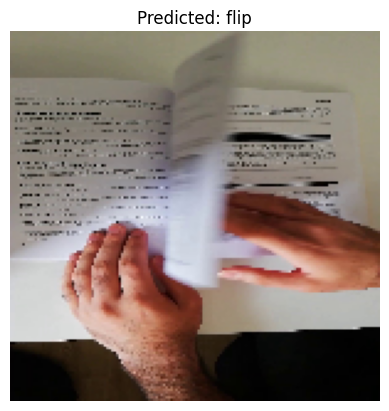

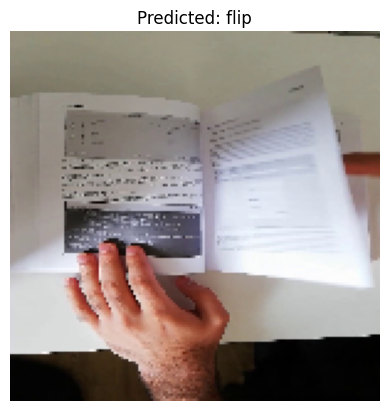

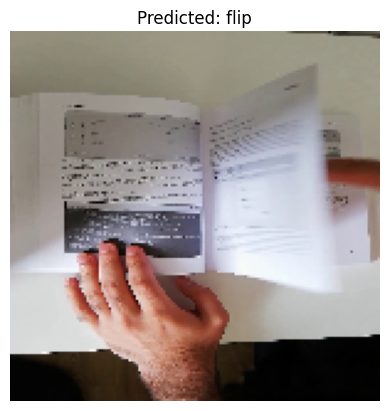

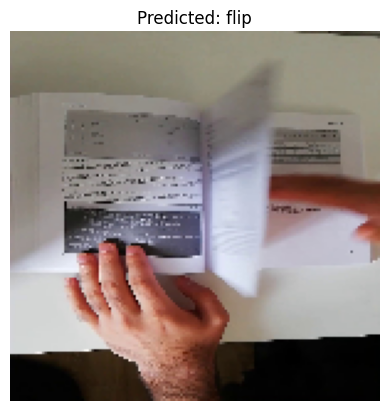

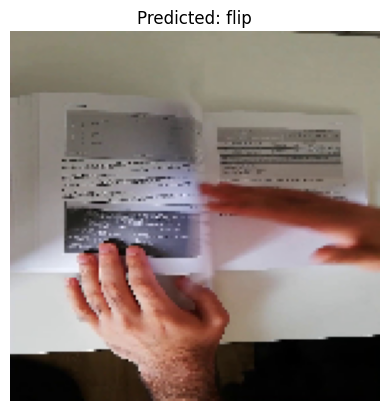

In [ ]:
# Set paths
train_dir = 'training'
test_dir = 'testing'

# Image parameters
img_height, img_width = 150, 150
batch_size = 32

# Load and preprocess data
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # for flip/notflip classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluate model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict on new data (example)
sample_images, sample_labels = next(test_generator)
predictions = model.predict(sample_images)
predicted_classes = (predictions > 0.5).astype(int)

# Show some predictions
for i in range(5):
    plt.imshow(sample_images[i])
    plt.title(f"Predicted: {'flip' if predicted_classes[i][0] == 1 else 'notflip'}")
    plt.axis('off')
    plt.show()